# Credit card fraud prediction

## Introduction

This is one of the most useful problems that engineers solve in commectial organizations. In my company another department tried to identify if transaction is a fraud or not. I'll try to do the same for this learning project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/card_transdata.csv', encoding = 'latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [3]:
pd.set_option('display.max_columns', None)
if df.isnull().values.any():
    print("Warning: Missing Data")
df.describe(include='all')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

# Models

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [6]:
X = df.drop('fraud', axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100500)

In [7]:
def show_model_results(klist, f1_test, f1_train, xlabel):
    plt.plot(klist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(klist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.xlabel(xlabel)
    plt.ylabel('Model F1 Score')

    plt.title('Results')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

### Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier

0.9419078636212583
0.9648406132613251
0.9794868632979074
0.9925167371870898
0.9988213834119959
0.9999433397004024
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478


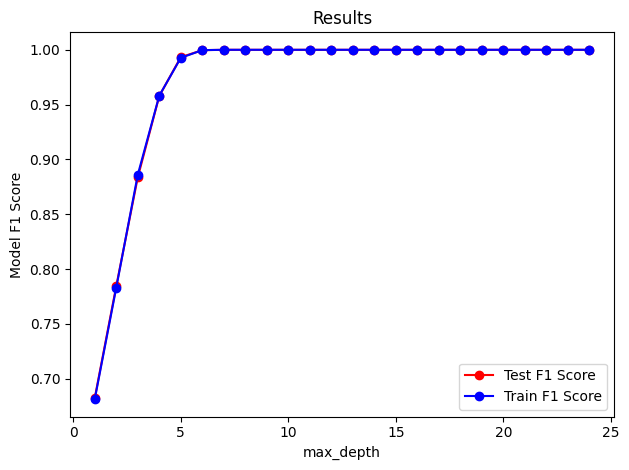

In [9]:
f1_test = []
f1_train = []
max_depth = list(range(1,25))
for i in max_depth:
    clf = DecisionTreeClassifier(max_depth=i, random_state=100500, criterion='gini')
    clf = clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    f1_test.append(f1_score(y_test, y_pred_test))
    f1_train.append(f1_score(y_train, y_pred_train))

show_model_results(klist=max_depth, f1_train=f1_train, f1_test=f1_test, xlabel='max_depth')

0.9419078636212583
0.9648406132613251
0.9788169787302441
0.9937988048975507
0.9991037901329628
0.9999433397004024
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478
0.9999966666378478


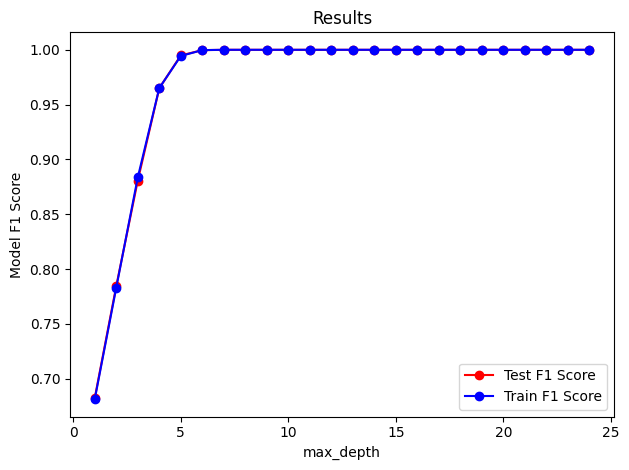

In [10]:
f1_test = []
f1_train = []
max_depth = list(range(1,25))
for i in max_depth:
    clf = DecisionTreeClassifier(max_depth=i, random_state=100500, criterion='entropy')
    clf = clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    f1_test.append(f1_score(y_test, y_pred_test))
    f1_train.append(f1_score(y_train, y_pred_train))

show_model_results(klist=max_depth, f1_train=f1_train, f1_test=f1_test, xlabel='max_depth')

### Neular networks

In [11]:
from sklearn.neural_network import MLPClassifier

0.9607310323614345
0.9864046022464306
0.982376039800598
0.9856307893643639
0.9844986266382753


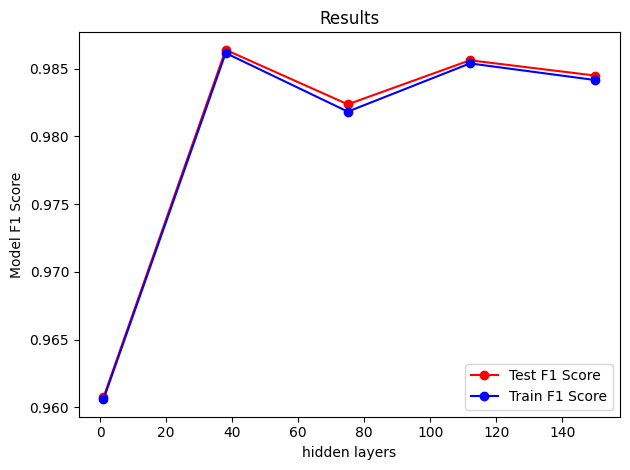

In [12]:
f1_test = []
f1_train = []
hlist = np.linspace(1,150,5).astype('int')
for i in hlist:
    clf = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='relu', learning_rate_init=0.05, random_state=100500)
    clf = clf.fit(X_train, y_train.values.ravel())
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))
    f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))

show_model_results(klist=hlist, f1_train=f1_train, f1_test=f1_test, xlabel='hidden layers')

### Boosted decision tree

In [13]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

0.8712118432096936
0.9735637289952382
0.9968068322753453
0.9969205465929672


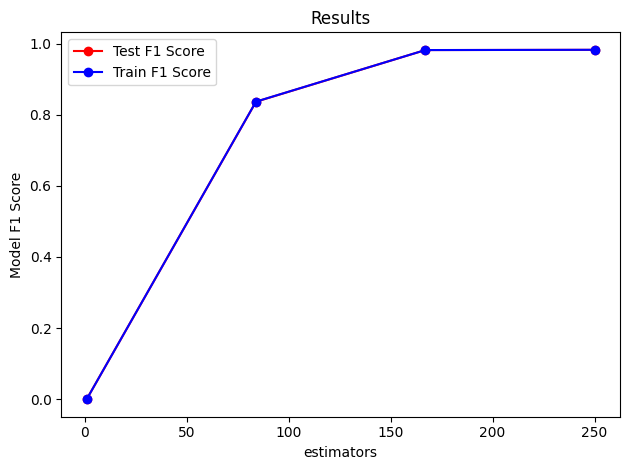

In [14]:
f1_test = []
f1_train = []
n_estimators = np.linspace(1,250,4).astype('int')
for i in n_estimators:
    clf = GradientBoostingClassifier(loss='log_loss', n_estimators=i, max_depth=1, random_state=100500)
    clf = clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    f1_test.append(f1_score(y_test, y_pred_test))
    f1_train.append(f1_score(y_train, y_pred_train))

show_model_results(klist=n_estimators, f1_train=f1_train, f1_test=f1_test, xlabel='estimators')


### Support vector machines

In [15]:
from sklearn.svm import SVC

In [16]:
f1_test = []
f1_train = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    print("Started ", kernel)
    clf = SVC(kernel=kernel, random_state=100500)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    f1_test.append(f1_score(y_test, y_pred_test))
    f1_train.append(f1_score(y_train, y_pred_train))
    print("Done ", kernel)

show_model_results(klist=kernels, f1_train=f1_train, f1_test=f1_test, xlabel='kernel')

### k-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier as kNN

0.9847057315762686
0.983493278830931
0.982323258035661
0.9807375076311827
0.9787067006440009


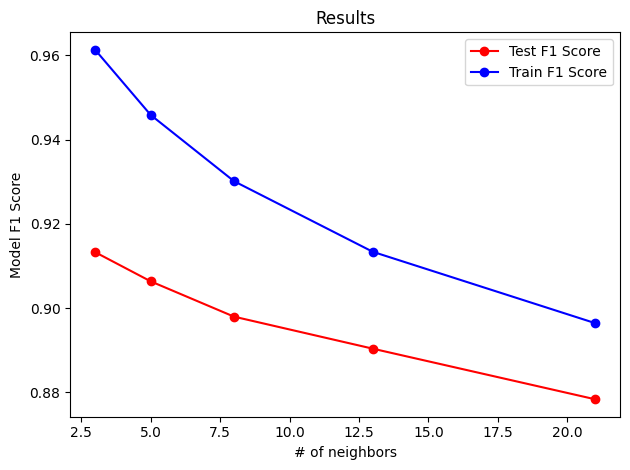

In [18]:
f1_test = []
f1_train = []
neighbors = [3, 5, 8, 13, 21]
for neighbor in neighbors:
    clf = kNN(n_neighbors=neighbor, n_jobs=-1)
    clf = clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    print(f1_score(y_test, y_pred_test, average='weighted'))
    f1_test.append(f1_score(y_test, y_pred_test))
    f1_train.append(f1_score(y_train, y_pred_train))

show_model_results(neighbors, f1_test=f1_test, f1_train=f1_train, xlabel='# of neighbors')